In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(type(train_images))
print(type(test_labels))
print(len(train_images))
print(len(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
60000
60000


In [6]:
print(train_images[0].shape)

(28, 28)


In [7]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

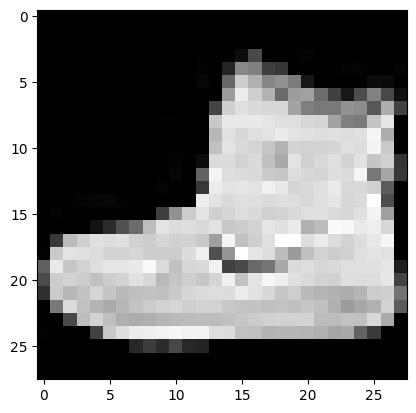

In [8]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [9]:
print(train_labels[0])

9


**class_names = ["t-shirt","trouser","pullover","dress","coat","sandal"."shirt","sneaker","bag","ankle/boot"]**

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
test_images.shape

(10000, 28, 28, 1)

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5024 - accuracy: 0.8142 - val_loss: 0.3795 - val_accuracy: 0.8620
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3254 - accuracy: 0.8808 - val_loss: 0.3179 - val_accuracy: 0.8876
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2760 - accuracy: 0.8983 - val_loss: 0.3004 - val_accuracy: 0.8909
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.9086 - val_loss: 0.2764 - val_accuracy: 0.8997
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2233 - accuracy: 0.9180 - val_loss: 0.2799 - val_accuracy: 0.9006


In [40]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("\n Test Accuracy : ",test_acc)

313/313 - 1s - loss: 0.2799 - accuracy: 0.9006 - 846ms/epoch - 3ms/step

 Test Accuracy :  0.900600016117096


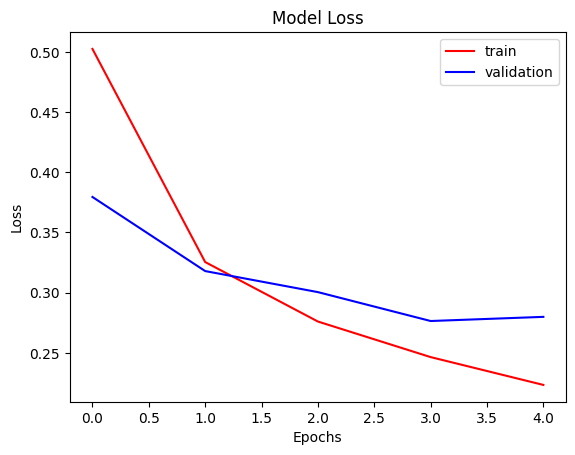

In [38]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

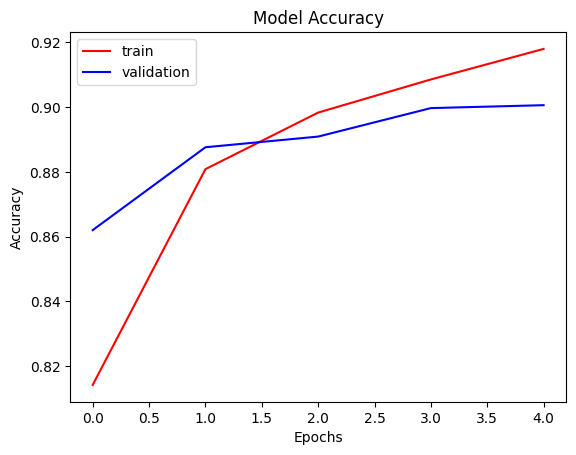

In [39]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
model.save('fashion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
